In [41]:
print('\033[1m'+'\033[91m'+"This Program is designed to work with the Dataset, I created.\nIf you change the CSV file, You will face Error.\nRMSE is Around 0.1 for these Hyperparameters which can be further decreased with enough time and tuning of Hyperparameters.\nPlease Install All the required Libraries and If you face any error or confusion please Contact before making changes to the program")
        
        

This Program is designed to work with the Dataset, I created.
If you change the CSV file, You will face Error.
RMSE is Around 0.1 for these Hyperparameters which can be further decreased with enough time and tuning of Hyperparameters.
Please Install All the required Libraries and If you face any error or confusion please Contact before making changes to the program


In [1]:
import pandas as pd
from pandas import DataFrame
#from pandas import DataFrame as df
Data= pd.read_csv('Tax data Q.csv',index_col=0,header=0,names=['Date','TT','ST','CiT','AT','FT','IT'])
print(Data.shape)
print(Data.head())

(204, 6)
                  TT          ST        CiT        AT         FT          IT
Date                                                                        
2002-01  1095.315066  367.773012   8.722881  2.720454  66.812877  525.385664
2002-02   641.066364  286.053100  10.049799  2.239870  62.291746  226.164802
2002-03   721.044978  289.556367   8.667918  1.687676  63.137285  289.269781
2002-04  1189.753819  303.809817   9.824586  3.802815  71.536089  567.748736
2002-05   866.010252  322.524936  11.343741  3.006710  79.902390  361.984500


In [2]:
#This function converts our data into a supervised learning problem. 
#I am using previous 5 month data to predict next month total tax.


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [4]:
#Here I simply call the Series_to_supervised function to manage my input data.
#See that the features go upto (t-5), meaning we are using previous 5 month data.(We can change it to increase the performance.)
dd=series_to_supervised(Data,5,1)

dd.columns=['TT(t-5)','ST(t-5)','CiT(t-5)','AT(t-5)','FT(t-5)','IT(t-5)','TT(t-4)','ST(t-4)','CiT(t-4)','AT(t-4)','FT(t-4)','IT(t-4)','TT(t-3)','ST(t-3)','CiT(t-3)','AT(t-3)','FT(t-3)','IT(t-3)','TT(t-2)','ST(t-2)','CiT(t-2)','AT(t-2)','FT(t-2)','IT(t-2)','TT(t-1)','ST(t-1)','CiT(t-1)','AT(t-1)','FT(t-1)','IT(t-1)','TT(t)','ST(t)','CiT(t)','AT(t)','FT(t)','IT(t)']
dff=dd.drop(dd.columns[[31,32,33,34,35]],1)
print(dff.head())

             TT(t-5)     ST(t-5)   CiT(t-5)   AT(t-5)    FT(t-5)     IT(t-5)  \
Date                                                                           
2002-06  1095.315066  367.773012   8.722881  2.720454  66.812877  525.385664   
2002-07   641.066364  286.053100  10.049799  2.239870  62.291746  226.164802   
2002-08   721.044978  289.556367   8.667918  1.687676  63.137285  289.269781   
2002-09  1189.753819  303.809817   9.824586  3.802815  71.536089  567.748736   
2002-10   866.010252  322.524936  11.343741  3.006710  79.902390  361.984500   

             TT(t-4)     ST(t-4)   CiT(t-4)   AT(t-4)  ...   AT(t-2)  \
Date                                                   ...             
2002-06   641.066364  286.053100  10.049799  2.239870  ...  3.802815   
2002-07   721.044978  289.556367   8.667918  1.687676  ...  3.006710   
2002-08  1189.753819  303.809817   9.824586  3.802815  ...  4.151800   
2002-09   866.010252  322.524936  11.343741  3.006710  ...  2.878429   
2002-10

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#X is the number of features, We are using 30 features(5 for each month)
#Y is the label/output, Total Tax of Next month
X=dff[['TT(t-5)','ST(t-5)','CiT(t-5)','AT(t-5)','FT(t-5)','IT(t-5)','TT(t-4)','ST(t-4)','CiT(t-4)','AT(t-4)','FT(t-4)','IT(t-4)','TT(t-3)','ST(t-3)','CiT(t-3)','AT(t-3)','FT(t-3)','IT(t-3)','TT(t-2)','ST(t-2)','CiT(t-2)','AT(t-2)','FT(t-2)','IT(t-2)','TT(t-1)','ST(t-1)','CiT(t-1)','AT(t-1)','FT(t-1)','IT(t-1)']]
y=dff[['TT(t)']]

#Splitting the data into Train and Test data set

train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=10)
print("Training Data Input (train_x) :\n",train_x.head())
print("Training Data Input Shape (train_x) :\n",train_x.shape)
print("Training Data Output (train_y):\n",train_y.head())
print("Training Data Output Shape (train_y):\n",train_y.shape)
print("Test Data Input (test_x): \n",test_x.head())
print("Test Data Input Shape (test_x): \n",test_x.shape)
print("Test Data Output (test_y): \n",test_y.head())
print("Test Data Output Shape (test_y): \n",test_y.shape)

#PreProcessing The Data and Scaling it from (0,1)

Scaler = MinMaxScaler(feature_range=(0,1))

train_x = Scaler.fit_transform(train_x)
train_y = Scaler.fit_transform(train_y)
test_x = Scaler.fit_transform(test_x)
test_y = Scaler.fit_transform(test_y)


#Reshaping for LSTM

train_X=train_x.reshape(train_x.shape[0], 1 ,train_x.shape[1])

print("Training Data Input Shape (train_X) :\n",train_X.shape)

test_X=test_x.reshape(test_x.shape[0], 1 ,test_x.shape[1])

print("Test Data Input Shape (test_X): \n",test_X.shape)


Training Data Input (train_x) :
              TT(t-5)     ST(t-5)   CiT(t-5)   AT(t-5)    FT(t-5)     IT(t-5)  \
Date                                                                           
2017-03  1481.697212  629.570552  35.949013  4.875773  78.164937  653.270380   
2011-07   942.781621  495.459595  29.289946  2.345145  79.678064  262.976406   
2010-05  1178.707871  472.160232  41.214232  4.378567  68.802795  423.781426   
2016-04  1373.503619  599.475167  33.831846  4.091507  80.474373  583.394315   
2015-05  1597.218779  617.115848  44.904326  4.481073  77.132402  561.537701   

             TT(t-4)     ST(t-4)   CiT(t-4)   AT(t-4)  ...   CiT(t-2)  \
Date                                                   ...              
2017-03  1332.024712  600.347203  38.621245  3.961922  ...  34.826930   
2011-07  1192.184138  486.655624  38.875480  2.591587  ...  39.882704   
2010-05  1343.454035  571.253764  37.508584  3.998542  ...  37.094243   
2016-04  1559.458917  595.241175  42.4237

Epoch 1/500
111/111 - 3s - loss: 0.0399 - val_loss: 0.0171
Epoch 2/500
111/111 - 0s - loss: 0.0305 - val_loss: 0.0231
Epoch 3/500
111/111 - 0s - loss: 0.0233 - val_loss: 0.0142
Epoch 4/500
111/111 - 0s - loss: 0.0230 - val_loss: 0.0144
Epoch 5/500
111/111 - 0s - loss: 0.0195 - val_loss: 0.0205
Epoch 6/500
111/111 - 0s - loss: 0.0186 - val_loss: 0.0208
Epoch 7/500
111/111 - 0s - loss: 0.0217 - val_loss: 0.0150
Epoch 8/500
111/111 - 0s - loss: 0.0164 - val_loss: 0.0151
Epoch 9/500
111/111 - 0s - loss: 0.0159 - val_loss: 0.0141
Epoch 10/500
111/111 - 0s - loss: 0.0152 - val_loss: 0.0187
Epoch 11/500
111/111 - 0s - loss: 0.0138 - val_loss: 0.0128
Epoch 12/500
111/111 - 0s - loss: 0.0131 - val_loss: 0.0157
Epoch 13/500
111/111 - 0s - loss: 0.0136 - val_loss: 0.0166
Epoch 14/500
111/111 - 0s - loss: 0.0117 - val_loss: 0.0121
Epoch 15/500
111/111 - 0s - loss: 0.0139 - val_loss: 0.0106
Epoch 16/500
111/111 - 0s - loss: 0.0144 - val_loss: 0.0174
Epoch 17/500
111/111 - 0s - loss: 0.0124 - val_lo

111/111 - 0s - loss: 0.0072 - val_loss: 0.0055
Epoch 138/500
111/111 - 0s - loss: 0.0040 - val_loss: 0.0051
Epoch 139/500
111/111 - 0s - loss: 0.0040 - val_loss: 0.0054
Epoch 140/500
111/111 - 0s - loss: 0.0050 - val_loss: 0.0048
Epoch 141/500
111/111 - 0s - loss: 0.0043 - val_loss: 0.0055
Epoch 142/500
111/111 - 0s - loss: 0.0065 - val_loss: 0.0054
Epoch 143/500
111/111 - 0s - loss: 0.0043 - val_loss: 0.0047
Epoch 144/500
111/111 - 0s - loss: 0.0051 - val_loss: 0.0048
Epoch 145/500
111/111 - 0s - loss: 0.0045 - val_loss: 0.0048
Epoch 146/500
111/111 - 0s - loss: 0.0059 - val_loss: 0.0051
Epoch 147/500
111/111 - 0s - loss: 0.0041 - val_loss: 0.0068
Epoch 148/500
111/111 - 0s - loss: 0.0067 - val_loss: 0.0054
Epoch 149/500
111/111 - 0s - loss: 0.0067 - val_loss: 0.0066
Epoch 150/500
111/111 - 0s - loss: 0.0047 - val_loss: 0.0054
Epoch 151/500
111/111 - 0s - loss: 0.0043 - val_loss: 0.0084
Epoch 152/500
111/111 - 0s - loss: 0.0042 - val_loss: 0.0060
Epoch 153/500
111/111 - 0s - loss: 0.0

Epoch 272/500
111/111 - 0s - loss: 0.0039 - val_loss: 0.0086
Epoch 273/500
111/111 - 0s - loss: 0.0045 - val_loss: 0.0060
Epoch 274/500
111/111 - 0s - loss: 0.0034 - val_loss: 0.0051
Epoch 275/500
111/111 - 0s - loss: 0.0035 - val_loss: 0.0067
Epoch 276/500
111/111 - 0s - loss: 0.0033 - val_loss: 0.0050
Epoch 277/500
111/111 - 0s - loss: 0.0035 - val_loss: 0.0050
Epoch 278/500
111/111 - 0s - loss: 0.0036 - val_loss: 0.0071
Epoch 279/500
111/111 - 0s - loss: 0.0051 - val_loss: 0.0092
Epoch 280/500
111/111 - 0s - loss: 0.0065 - val_loss: 0.0050
Epoch 281/500
111/111 - 0s - loss: 0.0042 - val_loss: 0.0070
Epoch 282/500
111/111 - 0s - loss: 0.0053 - val_loss: 0.0055
Epoch 283/500
111/111 - 0s - loss: 0.0030 - val_loss: 0.0065
Epoch 284/500
111/111 - 0s - loss: 0.0032 - val_loss: 0.0058
Epoch 285/500
111/111 - 0s - loss: 0.0034 - val_loss: 0.0094
Epoch 286/500
111/111 - 0s - loss: 0.0051 - val_loss: 0.0096
Epoch 287/500
111/111 - 0s - loss: 0.0054 - val_loss: 0.0066
Epoch 288/500
111/111 - 

Epoch 407/500
111/111 - 0s - loss: 0.0026 - val_loss: 0.0115
Epoch 408/500
111/111 - 0s - loss: 0.0040 - val_loss: 0.0057
Epoch 409/500
111/111 - 0s - loss: 0.0052 - val_loss: 0.0065
Epoch 410/500
111/111 - 0s - loss: 0.0051 - val_loss: 0.0055
Epoch 411/500
111/111 - 0s - loss: 0.0037 - val_loss: 0.0071
Epoch 412/500
111/111 - 0s - loss: 0.0036 - val_loss: 0.0053
Epoch 413/500
111/111 - 0s - loss: 0.0020 - val_loss: 0.0054
Epoch 414/500
111/111 - 0s - loss: 0.0024 - val_loss: 0.0064
Epoch 415/500
111/111 - 0s - loss: 0.0039 - val_loss: 0.0062
Epoch 416/500
111/111 - 0s - loss: 0.0032 - val_loss: 0.0059
Epoch 417/500
111/111 - 0s - loss: 0.0037 - val_loss: 0.0058
Epoch 418/500
111/111 - 0s - loss: 0.0025 - val_loss: 0.0061
Epoch 419/500
111/111 - 0s - loss: 0.0029 - val_loss: 0.0055
Epoch 420/500
111/111 - 0s - loss: 0.0026 - val_loss: 0.0066
Epoch 421/500
111/111 - 0s - loss: 0.0039 - val_loss: 0.0067
Epoch 422/500
111/111 - 0s - loss: 0.0035 - val_loss: 0.0064
Epoch 423/500
111/111 - 

<function matplotlib.pyplot.show(close=None, block=None)>

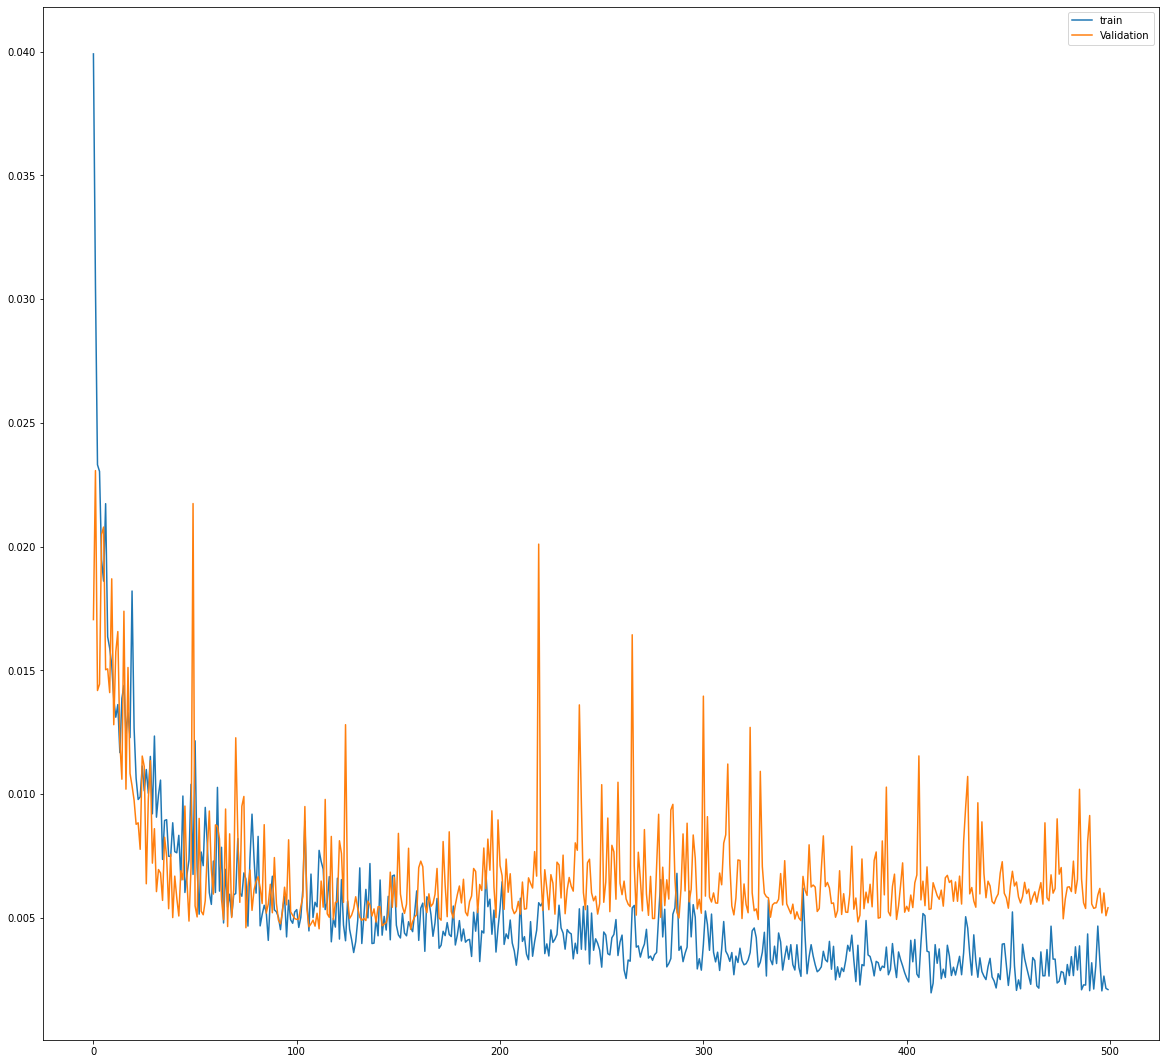

In [6]:
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense ,Dropout,LeakyReLU
from keras import optimizers

#design modek\l

model = Sequential()
model.add(LSTM(7,input_shape=(train_X.shape[1],train_X.shape[2]),activation='relu',return_sequences=True))
model.add(LSTM(15,activation='relu'))
model.add(Dense(1, activation='linear'))
adam = optimizers.Adam(lr=0.01) #lr=Learning rate
model.compile(loss='mse', optimizer=adam)

from matplotlib import pyplot

#fit the model

history = model.fit(train_X,train_y,epochs=500,batch_size=1,validation_split=0.2,verbose=2,shuffle=True)

#plot history
pyplot.figure(figsize=(20,19))
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='Validation')
pyplot.legend()
pyplot.show


In [7]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Making Predictions on Test data and Finding RMSE

prediction=model.predict(test_X)
pred=Scaler.inverse_transform(prediction)
actual =Scaler.inverse_transform(test_y)
rmse=sqrt(mean_squared_error(test_y,prediction))
print("RMSE:",rmse)

RMSE: 0.16807880224380942


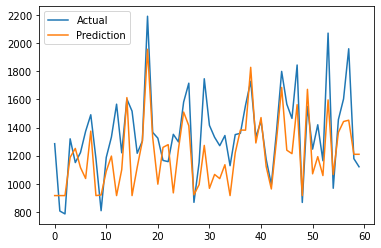

   Prediction(Mill$)         Actual(Mill$)      Difference(Mill$)
0        [915.53687]         [1285.204309]   [369.66744376562497]
1        [915.53687]         [805.5886246]    [-109.948240634375]
2        [915.53687]         [785.0037011]  [-130.53316413437506]
3        [1187.9048]         [1319.972116]   [132.06733084374991]
4        [1251.5698]         [1150.744886]  [-100.82493821875005]
5         [1115.649]         [1221.692702]   [106.04365414843755]
6        [1037.3801]  [1373.5036189999998]   [336.12349204687484]
7        [1374.6816]          [1491.28368]        [116.602039375]
8        [915.53687]         [1178.616375]   [263.07950976562506]
9          [919.781]   [807.9360267000001]  [-111.84497915937493]
10       [1088.8322]  [1187.2693160000001]    [98.43716267968762]
11       [1196.9379]           [1332.1094]   [135.17153378906255]
12       [915.53687]         [1566.647714]     [651.110848765625]
13       [1100.6265]  [1220.2843619999999]   [119.65789715624987]
14       [

In [8]:
#Saving the Prediction Results in a DataFrame and Showing a line graph
df = pd.DataFrame()

for i in range(30):
    arr = pred[i]
    arr1 =actual[i]
    df[i] = [arr,arr1,arr1-arr]
    
pyplot.plot(actual,label='Actual')
pyplot.plot(pred,label='Prediction')
pyplot.legend()
pyplot.show()

df=df.transpose()
df.columns=['Prediction(Mill$)','Actual(Mill$)','Difference(Mill$)']


print(df)



#df.append(actual)